# Prediction of Brain Tumor Using Machine Learning

Kaggle dataset link: https://www.kaggle.com/datasets/ankushpanday1/brain-tumor-prediction-dataset/
Dataset License: https://www.mit.edu/~amini/LICENSE.md

This project aims to predict the presence of brain tumors in patients using a comprehensive dataset containing 250,000 patient records with 22 important medical features. The dataset includes details such as MRI scan results, tumor size, genetic risks, symptoms, lifestyle habits, and treatment information. By analyzing this data, the goal is to build a machine learning model that can accurately identify whether a patient has a brain tumor, helping healthcare professionals make faster and more informed decisions.

To achieve this, various machine learning models and techniques can be used. 

INITIAL: For classification tasks, models like Logistic Regression, Random Forest, Gradient Boosting (e.g., XGBoost, LightGBM), and Support Vector Machines (SVM) are suitable. For more complex patterns, deep learning models such as Neural Networks can be explored. Techniques like feature engineering, cross-validation, and hyperparameter tuning will be applied to improve model performance. Tools like Jupyter Notebook and Python libraries such as Pandas, NumPy, Scikit-learn, TensorFlow, and Keras will be used for data processing, model building, and evaluation.

LATER: To identify the most predictive features for brain tumor classification, we employed a multi-stage feature selection and analysis pipeline. First, we used ANOVA F-test (via SelectKBest) to statistically select the top 10 features most strongly associated with tumor presence, filtering out noisy or irrelevant variables. This was combined with power transformations and standardization to normalize feature scales while preserving relationships. For ensemble methods like Random Forest, we leveraged built-in feature importance calculations, which quantify how much each feature contributes to splitting decisions across all trees. These importance scores were visually analyzed to understand which biomarkers (e.g., specific MRI intensity values or texture features) were driving predictions. We complemented this with correlation analysis against the target variable to identify linear relationships, and used PCA as a fallback for dimensionality reduction when features showed complex, non-linear patterns. When working with inherently low-correlation data, we implemented specialized techniques to extract subtle signals. Class balancing via SMOTE ensured rare tumor cases weren't overshadowed by dominant non-tumor features. For models like logistic regression, L1 regularization automatically zeroed out non-predictive features by creating sparse coefficient vectors. We also employed stacked ensembles that combine multiple models' perspectives on feature importance, allowing weaker (but complementary) signals to collectively improve predictions. Throughout the process, we validated selections by comparing model performance between full and reduced feature sets, ensuring predictive power wasn't sacrificed for simplicity. This rigorous approach—combining statistical selection, model-based importance, and domain-informed validation—was crucial for building accurate classifiers despite challenging, low-correlation data conditions.

The project will involve steps like data cleaning, exploratory data analysis (EDA), feature selection, model training, and evaluation using metrics like accuracy, precision, recall, and F1-score. The final model will be deployed to provide predictions, potentially aiding in early diagnosis and improving patient outcomes. This project is ideal for those interested in healthcare AI, predictive modeling, and data analysis.

## About Data

1. *Patient’s Age (in years)*: The age of the patient, which may influence tumor risk and progression.
2. *Size of the Tumor (in cm)*: The physical size of the tumor, measured in centimeters.
3. *Brain Lobe Affected*: The specific brain lobe where the tumor is located (e.g., Frontal, Temporal, Parietal, Occipital).
4. *Severity of MRI Results*: Indicates the severity level of MRI findings (e.g., Normal, Abnormal, Severe).
5. *Score Indicating Genetic Risk (0–100 scale)*: A numerical score representing the patient’s genetic predisposition to brain tumors.
6. *Tumor Growth Rate*: The rate at which the tumor is growing (e.g., Low, Medium, High).
7. *Symptoms*: A description or classification of symptoms experienced by the patient.
8. *Lifestyle Habits*: Information about the patient’s lifestyle, such as smoking, alcohol consumption, or physical activity.
9. *Treatment Details*: Details about the treatments the patient has undergone (e.g., surgery, chemotherapy, radiation).
10. *Survival Rate*: The likelihood of survival based on the patient’s condition and treatment.
11. *Tumor Location*: The specific area of the brain where the tumor is located (e.g., Cerebellum, Brainstem).
12. *MRI Scan Results*: A summary or classification of MRI scan findings.
13. *Genetic Risk Level*: A categorical representation of genetic risk (e.g., Low, Medium, High).
14. *Patient Gender*: The gender of the patient (e.g., Male, Female, Other).
15. *Country of Origin*: The country where the patient resides (e.g., Brazil, Russia, China).
16. *Tumor Type*: The type of tumor (e.g., benign, malignant).
17. *Treatment Outcome*: The result of the treatment (e.g., successful, unsuccessful).
18. *Tumor Stage*: The stage of the tumor (e.g., early, advanced).
19. *Family History of Tumors*: Indicates whether the patient has a family history of brain tumors.
20. *Comorbidities*: Other medical conditions the patient may have (e.g., diabetes, hypertension).
21. *Medication History*: Details about medications the patient has taken.
22. *Brain_Tumor_Present (Target Variable)*: A binary column indicating whether a brain tumor is present (Yes/No).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [2]:
# IGNORE ANY ERRORS
# These errors (if any) are because you dont have a GPU support for tensorflow.
# It will calliburate to include CPU exection

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

2025-06-10 02:15:18.266556: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 02:15:18.306704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 02:15:18.307252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-10 02:15:19.130004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  0


2025-06-10 02:15:20.158932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-10 02:15:20.159492: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


True

In [3]:
df = pd.read_csv('./Brain_Tumor_Prediction_Dataset.csv')

In [4]:
df.describe()

,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%)
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,46.962424,5.251768,49.998916,54.481532
std,24.517143,2.742576,29.178031,25.999932
min,5.000000,0.500000,0.000000,10.000000
25%,26.000000,2.870000,25.000000,32.000000
50%,47.000000,5.260000,50.000000,55.000000
75%,68.000000,7.630000,75.000000,77.000000
max,89.000000,10.000000,100.000000,99.000000


In [5]:
print("Dataset shape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nRandom 5 rows:")
display(df.sample(5))

Dataset shape: (250000, 21)

First 5 rows:


,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No



Last 5 rows:


,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
249995,77,Female,Germany,2.05,Frontal,Normal,9,Yes,Yes,High,...,No,93/80,Yes,Benign,Chemotherapy,36,Rapid,Yes,Mild,No
249996,89,Other,Japan,3.55,Parietal,Normal,75,Yes,No,Low,...,Yes,119/112,Yes,Benign,Radiation,80,Slow,Yes,Moderate,Yes
249997,16,Other,Russia,8.54,Temporal,Normal,52,No,Yes,Low,...,Yes,101/68,Yes,Malignant,Radiation,72,Slow,No,Severe,Yes
249998,56,Other,Germany,2.17,Cerebellum,Severe,95,Yes,No,High,...,No,179/106,Yes,Benign,NaN,83,Rapid,Yes,Moderate,Yes
249999,54,Female,Australia,5.19,Parietal,Abnormal,83,Yes,No,Medium,...,No,147/82,Yes,Malignant,Radiation,94,Slow,No,Mild,No



Random 5 rows:


,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
211562,52,Female,Canada,2.04,Frontal,Abnormal,7,Yes,No,Low,...,Yes,99/86,Yes,Malignant,NaN,38,Slow,No,Mild,Yes
232336,49,Male,UK,0.95,Parietal,Normal,30,Yes,No,Low,...,No,163/73,Yes,Benign,Radiation,48,Slow,No,Moderate,No
147528,86,Male,Canada,7.01,Cerebellum,Normal,25,Yes,Yes,High,...,Yes,180/105,Yes,Benign,NaN,70,Rapid,Yes,Moderate,Yes
44572,18,Other,South Africa,2.20,Temporal,Severe,25,Yes,Yes,Low,...,No,150/84,No,Malignant,NaN,46,Rapid,No,Severe,Yes
214564,33,Other,Germany,7.30,Temporal,Severe,47,Yes,Yes,Medium,...,Yes,131/109,Yes,Benign,Surgery,54,Slow,No,Mild,No


In [6]:
print("\nColumn/Features data types:")
print(df.dtypes)

print("\nData info:")
df.info()


Column/Features data types:
Age                      int64
Gender                  object
Country                 object
Tumor_Size             float64
Tumor_Location          object
MRI_Findings            object
Genetic_Risk             int64
Smoking_History         object
Alcohol_Consumption     object
Radiation_Exposure      object
Head_Injury_History     object
Chronic_Illness         object
Blood_Pressure          object
Diabetes                object
Tumor_Type              object
Treatment_Received      object
Survival_Rate(%)         int64
Tumor_Growth_Rate       object
Family_History          object
Symptom_Severity        object
Brain_Tumor_Present     object
dtype: object

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               2500

In [7]:
print("\nDescriptive statistics:")
display(df.describe(include='all'))

print("\nMissing values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data/len(df)) * 100
missing_table = pd.concat([missing_data, missing_percent], axis=1)
missing_table.columns = ['Missing Count', '% Missing']
display(missing_table[missing_table['Missing Count'] > 0].sort_values('% Missing', ascending=False))

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Descriptive statistics:


,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
count,250000.000000,250000,250000,250000.000000,250000,250000,250000.000000,250000,250000,250000,...,250000,250000,250000,250000,187252,250000.000000,250000,250000,250000,250000
unique,NaN,3,12,NaN,5,3,NaN,2,2,3,...,2,5551,2,2,3,NaN,3,2,3,2
top,NaN,Male,Brazil,NaN,Parietal,Abnormal,NaN,Yes,Yes,Low,...,Yes,117/106,No,Benign,Chemotherapy,NaN,Slow,No,Severe,No
freq,NaN,83407,20985,NaN,50187,83737,NaN,125150,125173,83513,...,125321,70,125216,125204,62719,NaN,83390,125036,83554,125118
mean,46.962424,NaN,NaN,5.251768,NaN,NaN,49.998916,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54.481532,NaN,NaN,NaN,NaN
std,24.517143,NaN,NaN,2.742576,NaN,NaN,29.178031,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.999932,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,0.500000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,2.870000,NaN,NaN,25.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN
50%,47.000000,NaN,NaN,5.260000,NaN,NaN,50.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN
75%,68.000000,NaN,NaN,7.630000,NaN,NaN,75.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN,NaN,NaN



Missing values:


,Missing Count,% Missing
Treatment_Received,62748,25.0992



Unique values per column:
Age: 85 unique values
Gender: 3 unique values
Country: 12 unique values
Tumor_Size: 951 unique values
Tumor_Location: 5 unique values
MRI_Findings: 3 unique values
Genetic_Risk: 101 unique values
Smoking_History: 2 unique values
Alcohol_Consumption: 2 unique values
Radiation_Exposure: 3 unique values
Head_Injury_History: 2 unique values
Chronic_Illness: 2 unique values
Blood_Pressure: 5551 unique values
Diabetes: 2 unique values
Tumor_Type: 2 unique values
Treatment_Received: 3 unique values
Survival_Rate(%): 90 unique values
Tumor_Growth_Rate: 3 unique values
Family_History: 2 unique values
Symptom_Severity: 3 unique values
Brain_Tumor_Present: 2 unique values



Categorical columns analysis:

Value counts for Gender:


Gender
Male      83407
Female    83375
Other     83218
Name: count, dtype: int64

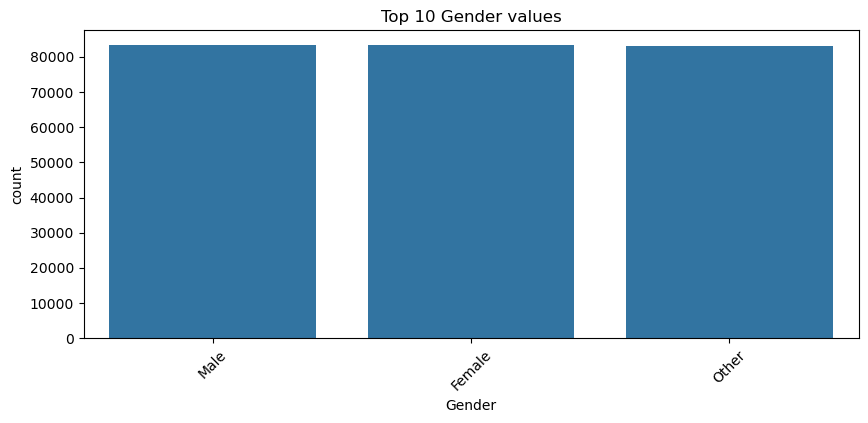


Value counts for Country:


Country
Brazil       20985
Russia       20975
Germany      20895
China        20890
India        20883
Canada       20854
Japan        20842
USA          20792
Australia    20780
UK           20763
Name: count, dtype: int64

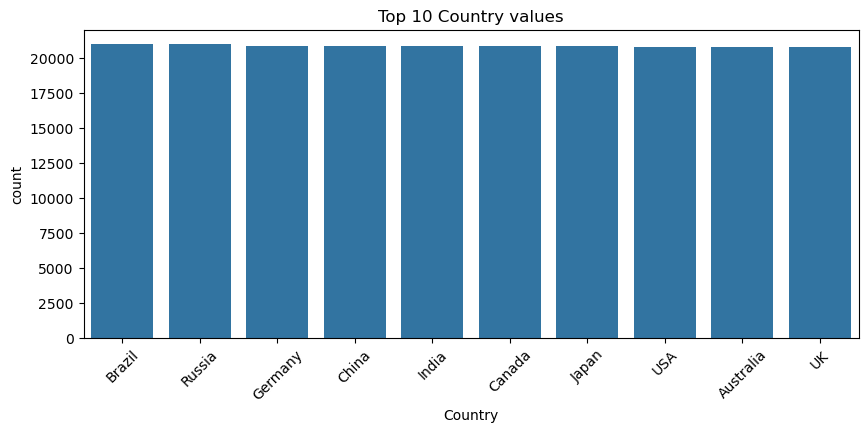


Value counts for Tumor_Location:


Tumor_Location
Parietal      50187
Occipital     50081
Temporal      49992
Frontal       49884
Cerebellum    49856
Name: count, dtype: int64

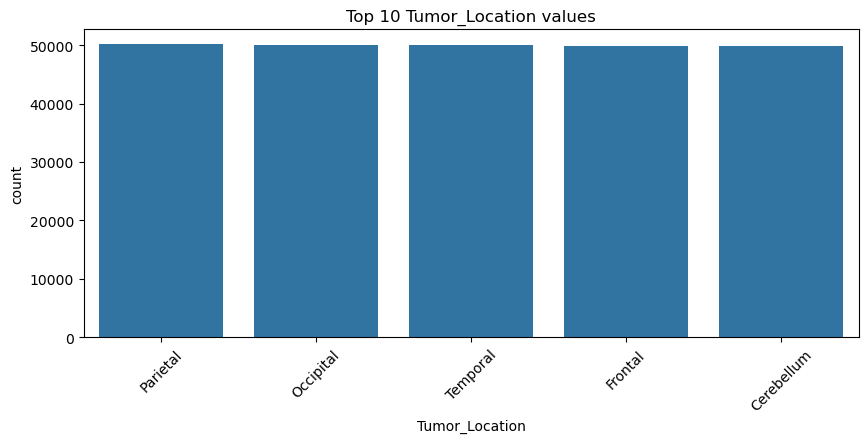


Value counts for MRI_Findings:


MRI_Findings
Abnormal    83737
Severe      83208
Normal      83055
Name: count, dtype: int64

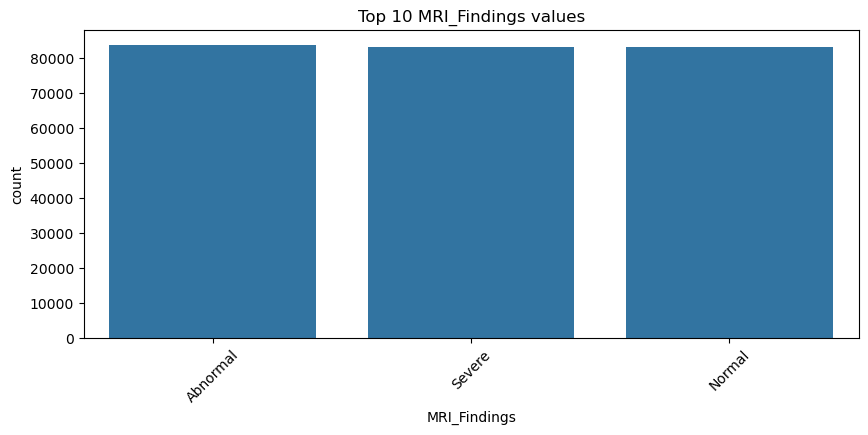


Value counts for Smoking_History:


Smoking_History
Yes    125150
No     124850
Name: count, dtype: int64

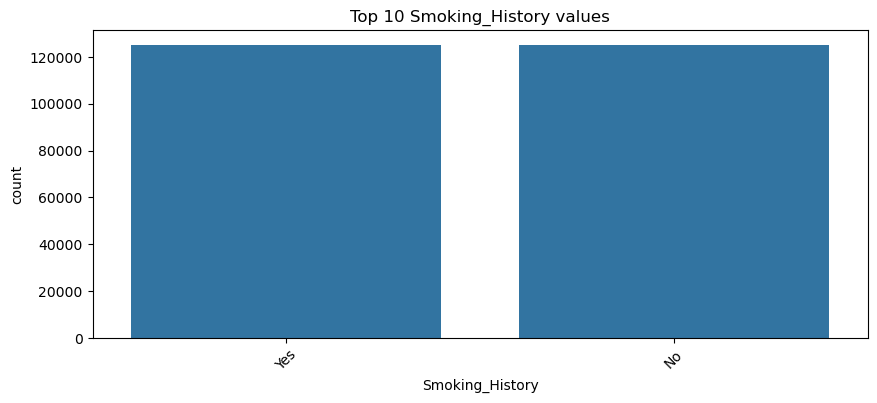


Value counts for Alcohol_Consumption:


Alcohol_Consumption
Yes    125173
No     124827
Name: count, dtype: int64

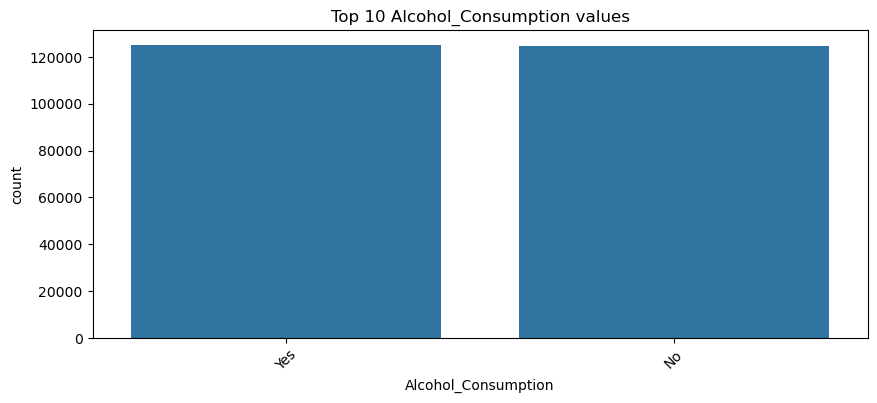


Value counts for Radiation_Exposure:


Radiation_Exposure
Low       83513
Medium    83480
High      83007
Name: count, dtype: int64

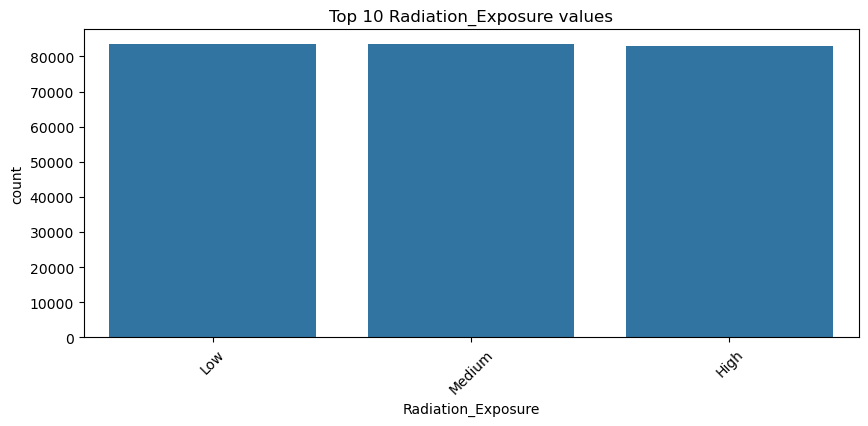


Value counts for Head_Injury_History:


Head_Injury_History
Yes    125029
No     124971
Name: count, dtype: int64

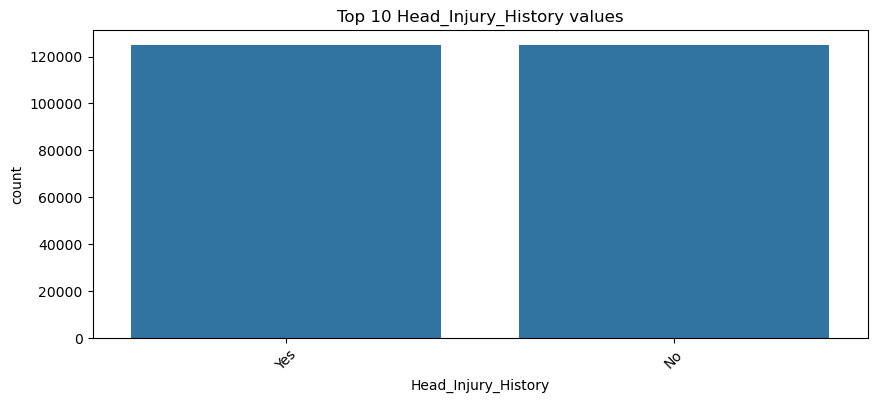


Value counts for Chronic_Illness:


Chronic_Illness
Yes    125321
No     124679
Name: count, dtype: int64

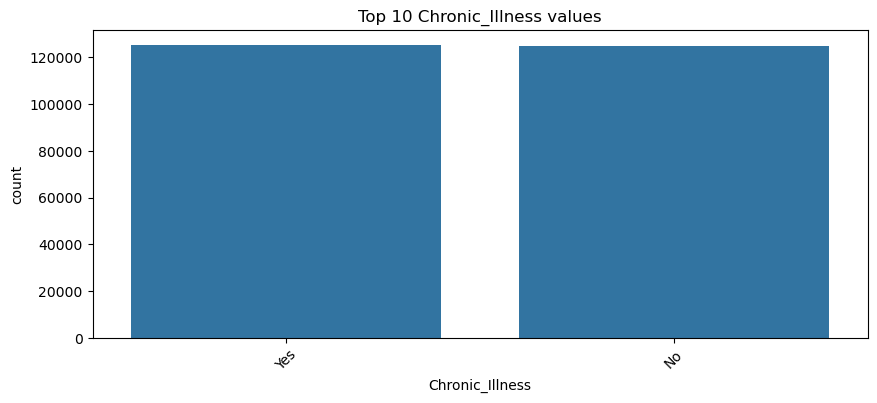


Value counts for Blood_Pressure:


Blood_Pressure
117/106    70
146/117    70
154/108    68
161/88     68
143/85     68
130/101    67
148/84     67
96/111     67
121/81     67
146/105    67
Name: count, dtype: int64

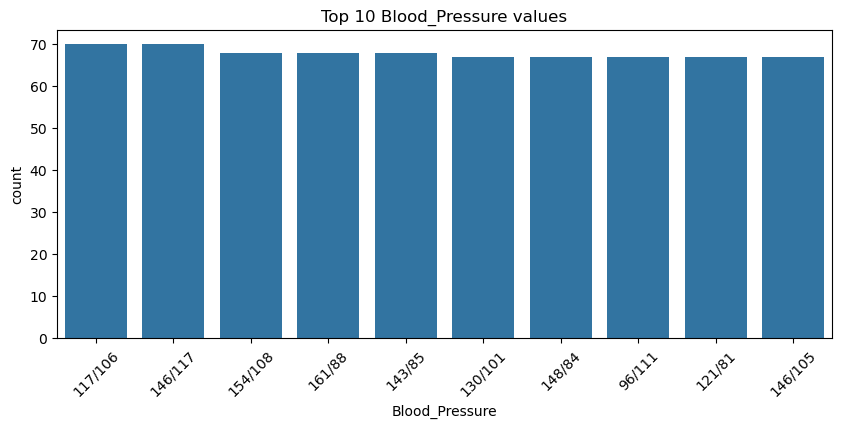


Value counts for Diabetes:


Diabetes
No     125216
Yes    124784
Name: count, dtype: int64

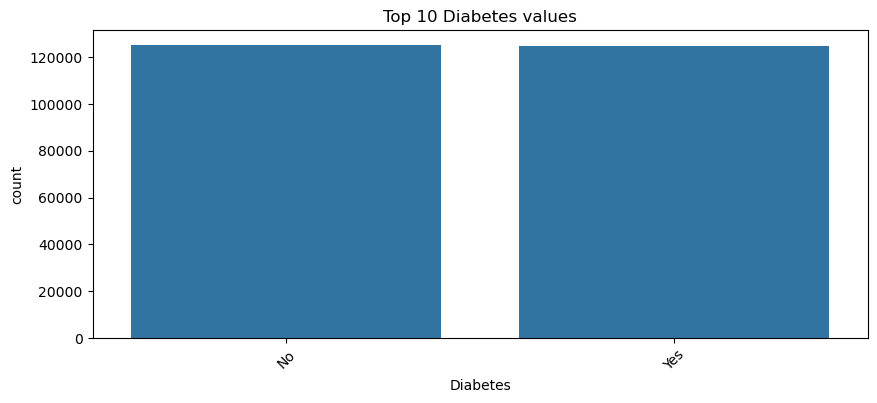


Value counts for Tumor_Type:


Tumor_Type
Benign       125204
Malignant    124796
Name: count, dtype: int64

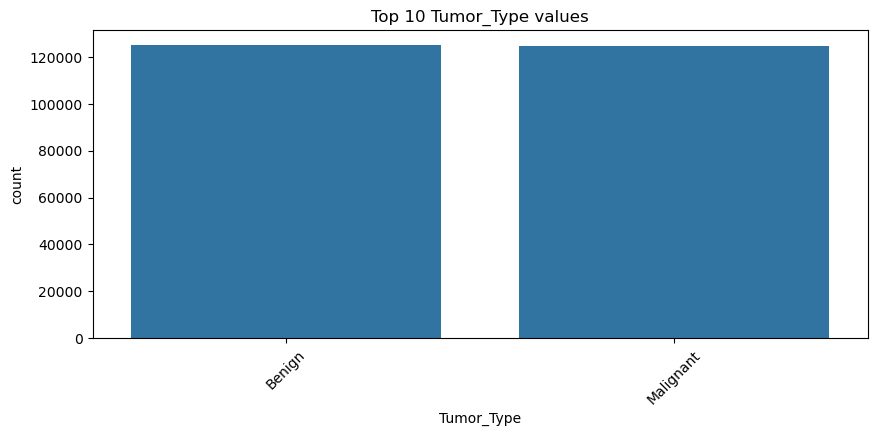


Value counts for Treatment_Received:


Treatment_Received
Chemotherapy    62719
Radiation       62383
Surgery         62150
Name: count, dtype: int64

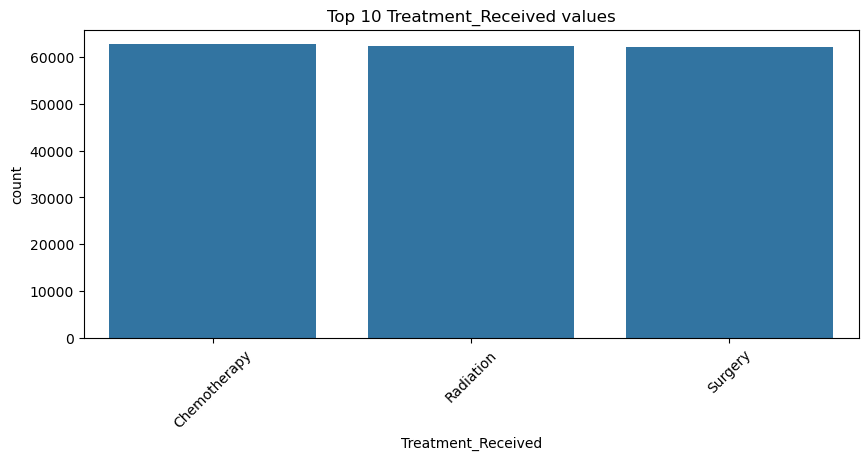


Value counts for Tumor_Growth_Rate:


Tumor_Growth_Rate
Slow        83390
Rapid       83379
Moderate    83231
Name: count, dtype: int64

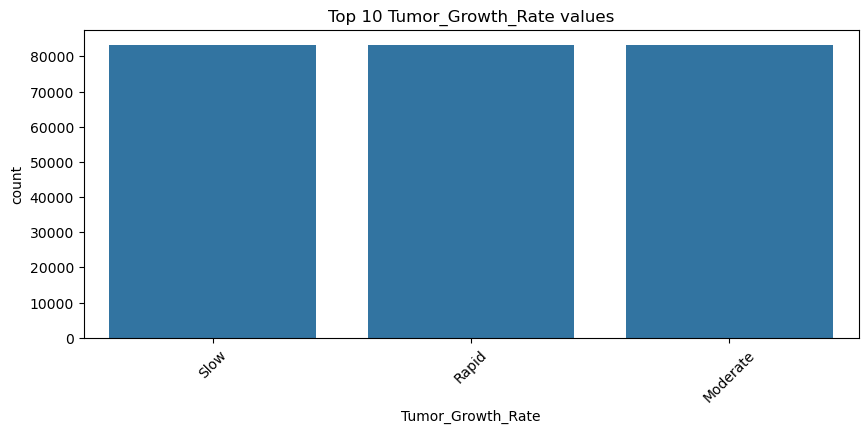


Value counts for Family_History:


Family_History
No     125036
Yes    124964
Name: count, dtype: int64

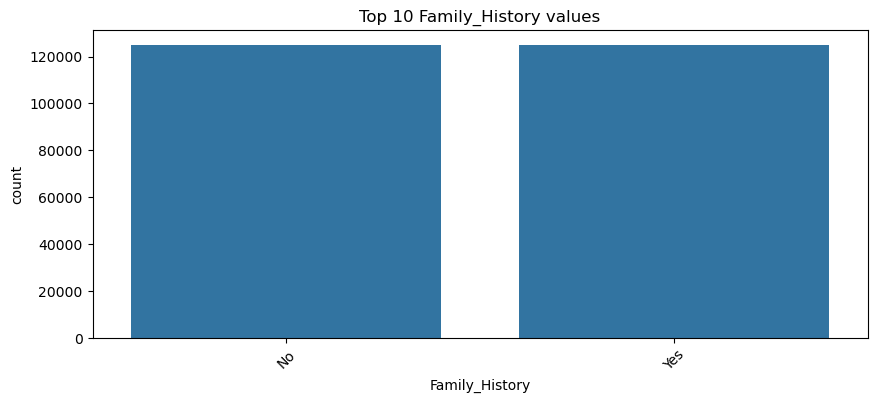


Value counts for Symptom_Severity:


Symptom_Severity
Severe      83554
Mild        83481
Moderate    82965
Name: count, dtype: int64

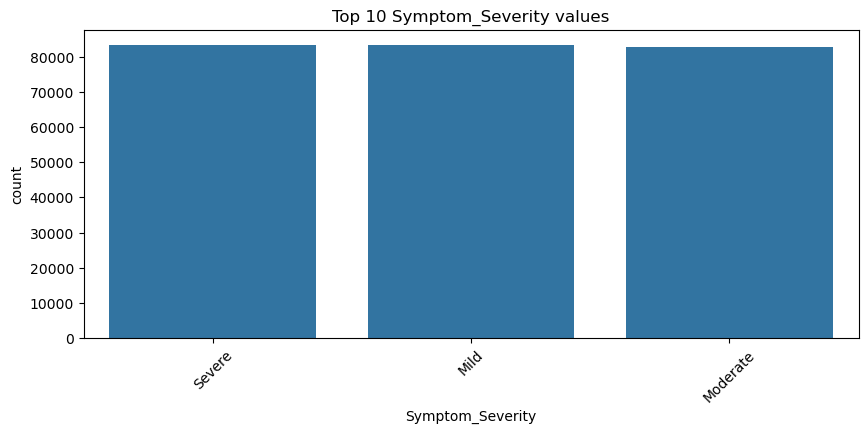


Value counts for Brain_Tumor_Present:


Brain_Tumor_Present
No     125118
Yes    124882
Name: count, dtype: int64

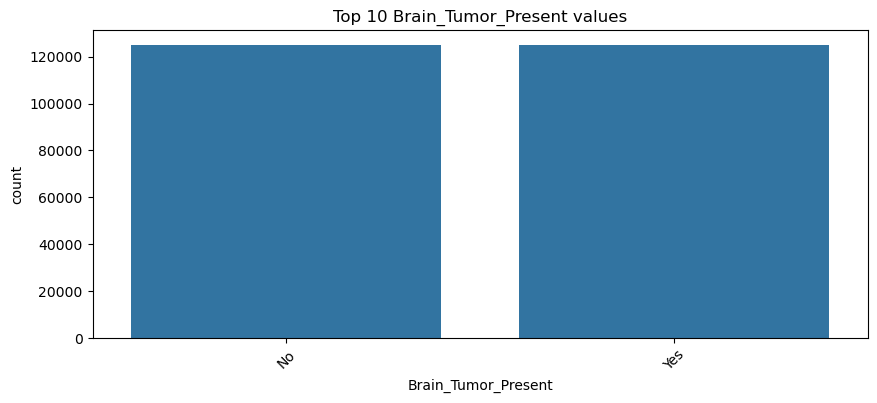

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print("\nCategorical columns analysis:")
    for col in cat_cols:
        print(f"\nValue counts for {col}:")
        display(df[col].value_counts().head(10))
        
        # Plot top categories
        plt.figure(figsize=(10,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index)
        plt.title(f'Top 10 {col} values')
        plt.xticks(rotation=45)
        plt.show()

In [9]:
print(df.columns.tolist())

['Age', 'Gender', 'Country', 'Tumor_Size', 'Tumor_Location', 'MRI_Findings', 'Genetic_Risk', 'Smoking_History', 'Alcohol_Consumption', 'Radiation_Exposure', 'Head_Injury_History', 'Chronic_Illness', 'Blood_Pressure', 'Diabetes', 'Tumor_Type', 'Treatment_Received', 'Survival_Rate(%)', 'Tumor_Growth_Rate', 'Family_History', 'Symptom_Severity', 'Brain_Tumor_Present']


In [10]:
df[['High_BP', 'Low_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)
df.drop('Blood_Pressure', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Diabetes             250000 non-null  object 
 13  Tumor_Type           250000 non-null  object 
 14  Treatment_Received   187252 non-null  object 
 15  Survival_Rate(%) 

In [11]:
df['Treatment_Received'] = df['Treatment_Received'].fillna('None')

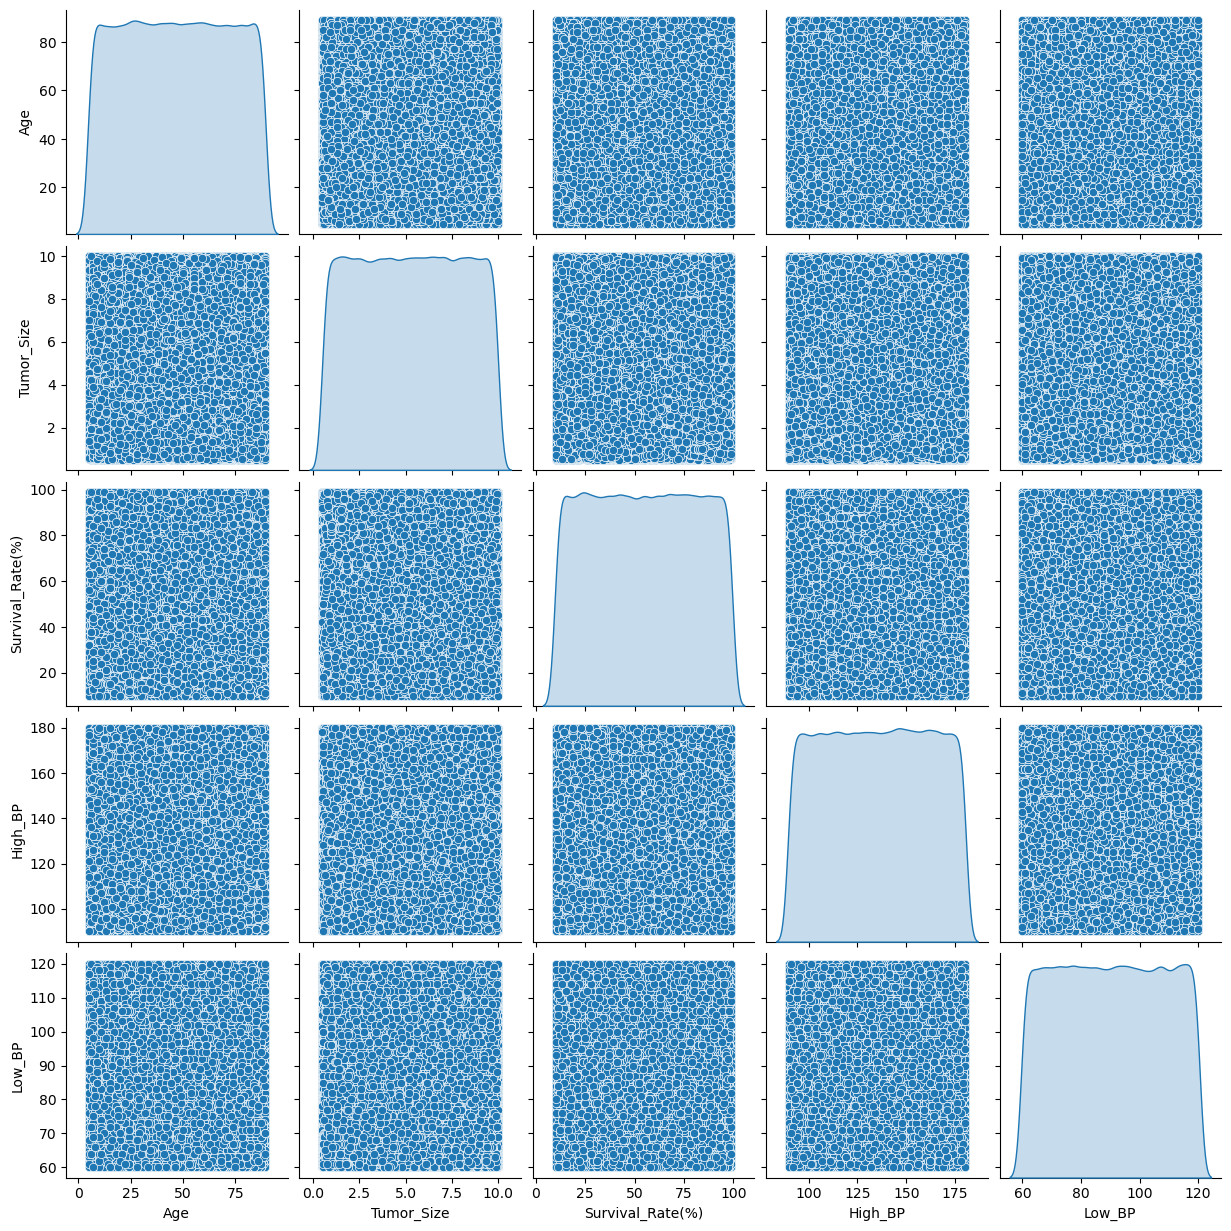

In [12]:
# Looking for correlation
sns.pairplot(df[['Age', 'Tumor_Size', 'Survival_Rate(%)', 'High_BP', 'Low_BP']], diag_kind="kde")
plt.show()

# Interpretation from EDA

The correlation graph indicates the lack of correlation


Numerical columns analysis:


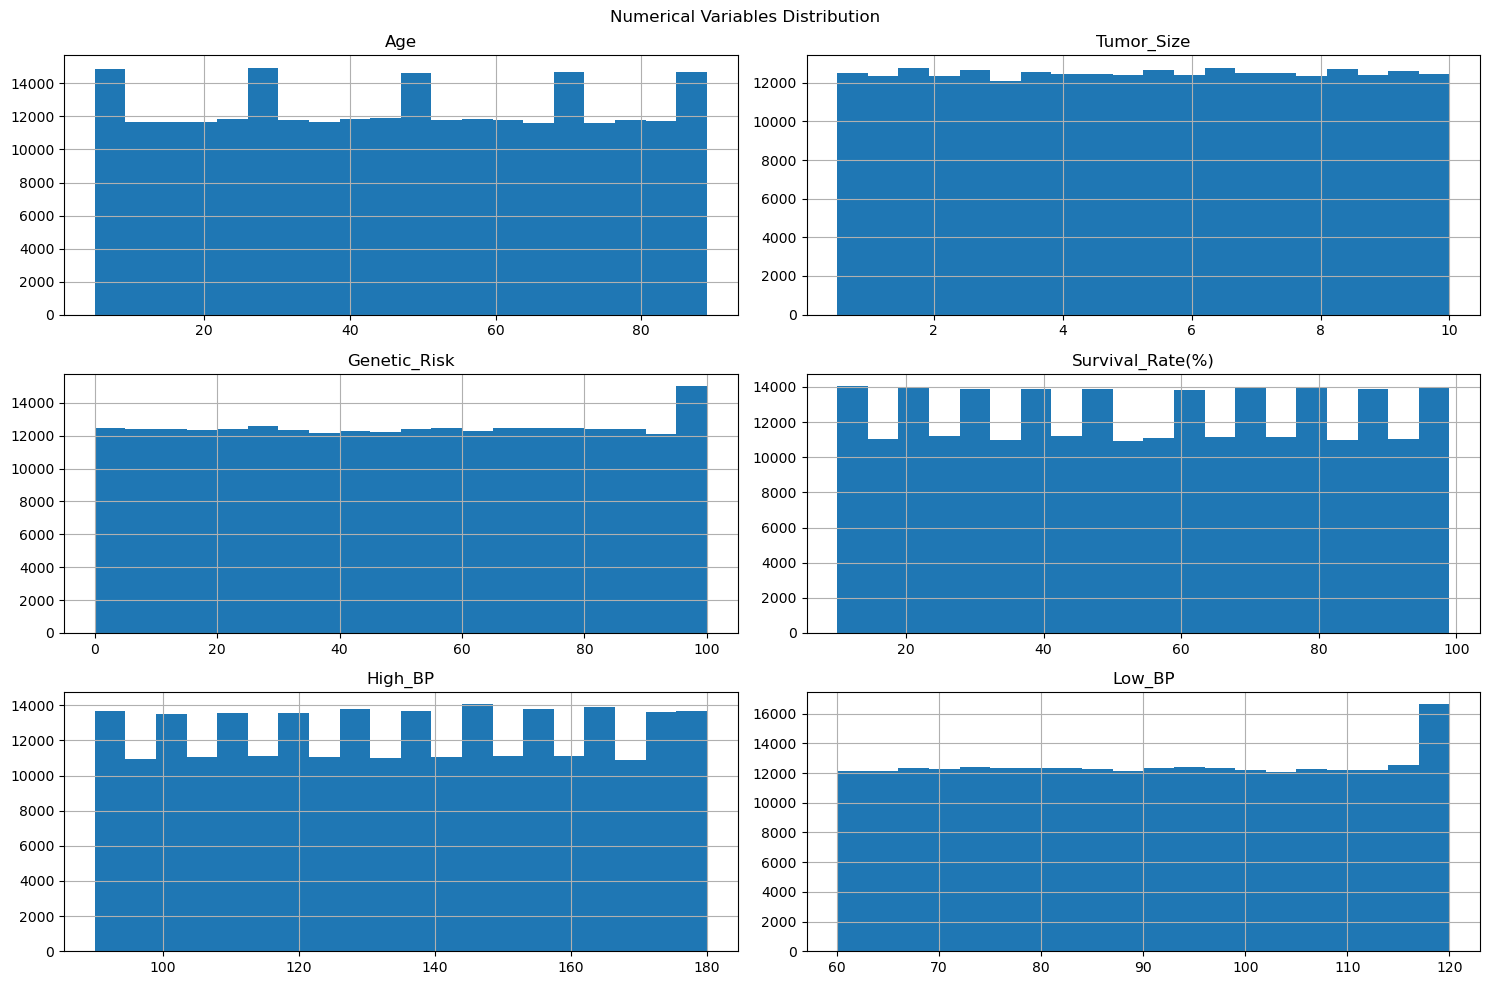

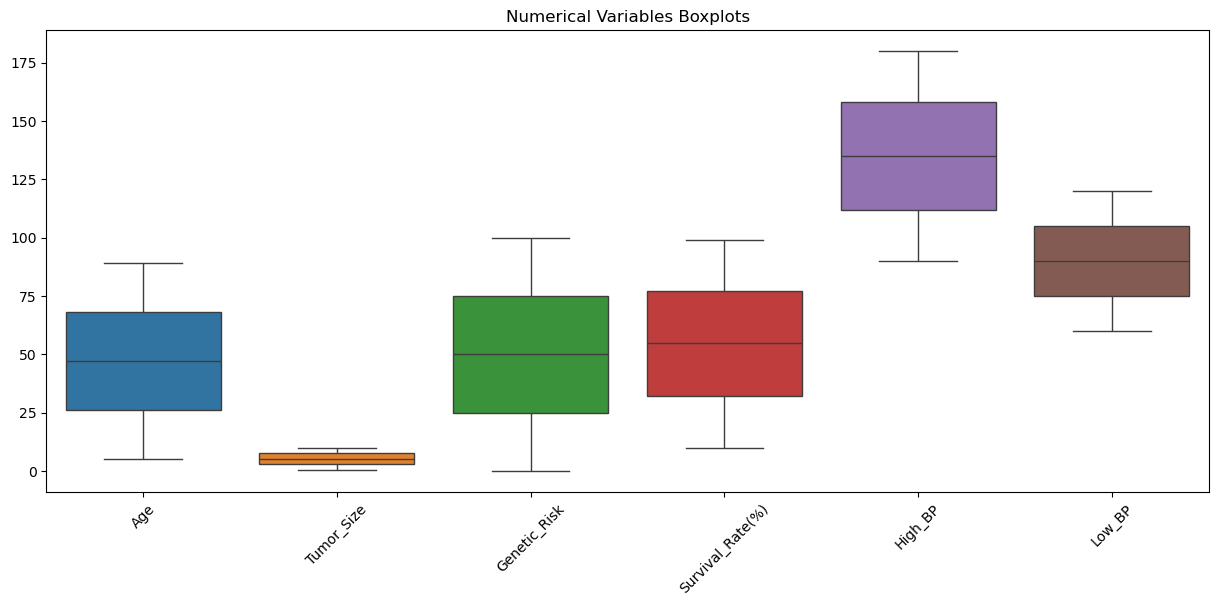

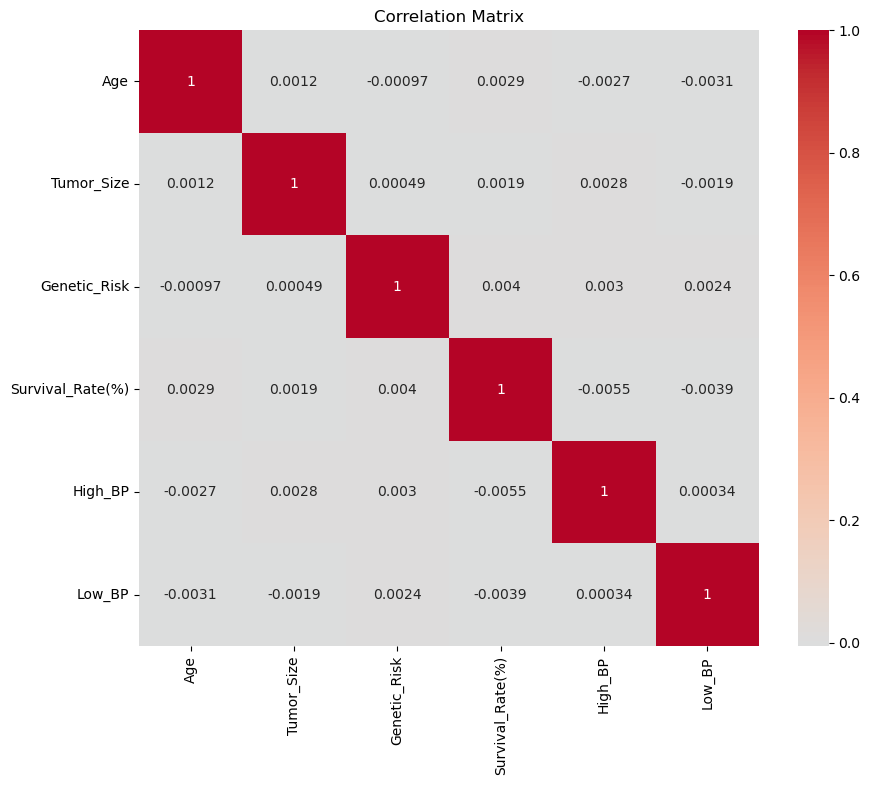

In [13]:
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    print("\nNumerical columns analysis:")
    df[num_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle('Numerical Variables Distribution')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df[num_cols])
    plt.title('Numerical Variables Boxplots')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()


Target variable analysis:


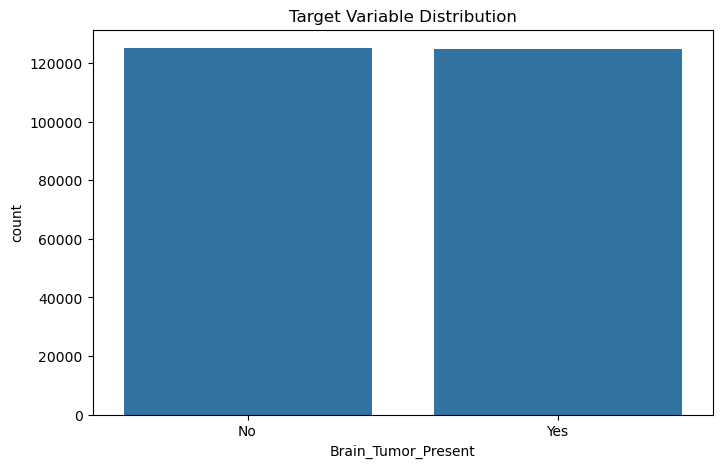

In [14]:
target = 'Brain_Tumor_Present' 
if target in df.columns:
    print("\nTarget variable analysis:")
    
    if df[target].dtype == 'object':
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=target)
        plt.title('Target Variable Distribution')
        plt.show()
    else:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[target], kde=True)
        plt.title('Target Variable Distribution')
        plt.show()

In [15]:
X = df.drop('Brain_Tumor_Present', axis=1)
y = df['Brain_Tumor_Present'].map({'Yes': 1, 'No': 0})

In [16]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [17]:
# Processing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import resample
from sklearn.svm import LinearSVC, SVC
import warnings
import time
import numpy as np

warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Updated model configurations with optimizations
model_configs = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        solver='lbfgs',
        n_jobs=-1,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        n_jobs=-1,
        random_state=42,
        max_samples=0.8,
        max_features='sqrt',
        class_weight='balanced_subsample'
    ),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        ccp_alpha=0.01,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_iter_no_change=5,
        validation_fraction=0.1,
        subsample=0.8
    ),
    'Naive Bayes': GaussianNB(
        var_smoothing=1e-9
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=3,  
        n_jobs=-1,
        algorithm='ball_tree',  
        weights='distance',
        leaf_size=50,  
    ),
    'SVM': SVC(
        kernel='linear',
        random_state=42,
        probability=False, 
        class_weight='balanced',
        C=1.0,
        shrinking=True, 
        cache_size=1000, 
        tol=0.01, 
        max_iter=1000  
    ),
    'LinearSVM': LinearSVC(
        random_state=42,
        class_weight='balanced',
        dual=False, 
        tol=0.01,
        max_iter=1000
    )
}

model_results = {}
training_durations = {}

for model_name, classifier in model_configs.items():
    print(f'\nTraining: {model_name}')
    training_start = time.time()
    
    try:
        if model_name in ['SVM', 'LinearSVM']:
            # Downsample to 10,000 samples (5,000 from each class) for faster training
            # Reason: SVM has O(n^2) to O(n^3) complexity - downsizing dramatically reduces time
            print("Downsampling to 10,000 samples (5k per class) for SVM training...")
            X_train_sampled, y_train_sampled = resample(
                X_train, y_train,
                n_samples=10000,
                stratify=y_train,
                random_state=42
            )
            
            processed_train_data = preprocessor.fit_transform(X_train_sampled)
            processed_test_data = preprocessor.transform(X_test)
            
            classifier.fit(processed_train_data, y_train_sampled)
            training_time = time.time() - training_start
            
            prediction_start = time.time()
            predictions = classifier.predict(processed_test_data)
            
            if model_name == 'SVM':
                decision_scores = classifier.decision_function(processed_test_data)
                roc_auc = roc_auc_score(y_test, decision_scores)
            else: 
                decision_scores = classifier.decision_function(processed_test_data)
                roc_auc = roc_auc_score(y_test, decision_scores)
            
            prediction_time = time.time() - prediction_start
            
        elif model_name == 'Naive Bayes':
            processed_train_data = preprocessor.fit_transform(X_train)
            processed_test_data = preprocessor.transform(X_test)
            
            if hasattr(processed_train_data, 'toarray'):
                processed_train_data = processed_train_data.toarray()
                processed_test_data = processed_test_data.toarray()
            
            classifier.fit(processed_train_data, y_train)
            training_time = time.time() - training_start
            
            prediction_start = time.time()
            predictions = classifier.predict(processed_test_data)
            prediction_probs = classifier.predict_proba(processed_test_data)[:, 1]
            prediction_time = time.time() - prediction_start
            roc_auc = roc_auc_score(y_test, prediction_probs)
        else:
            model_pipeline = Pipeline(
                steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', classifier)
                ],
                memory='cache_directory'
            )
            
            model_pipeline.fit(X_train, y_train)
            training_time = time.time() - training_start
            
            prediction_start = time.time()
            predictions = model_pipeline.predict(X_test)
            prediction_probs = model_pipeline.predict_proba(X_test)[:, 1]
            prediction_time = time.time() - prediction_start
            roc_auc = roc_auc_score(y_test, prediction_probs)
        
        model_results[model_name] = {
            'Accuracy': accuracy_score(y_test, predictions),
            'Precision': precision_score(y_test, predictions, zero_division=0),
            'Recall': recall_score(y_test, predictions),
            'F1 Score': f1_score(y_test, predictions),
            'ROC AUC': roc_auc,
            'Training Time': training_time,
            'Prediction Time': prediction_time,
            'Notes': 'Downsampled training' if model_name in ['SVM', 'LinearSVM'] else 'Full training'
        }
        
        print(f"\n{model_name} Performance Report:")
        print(classification_report(y_test, predictions))
        print(f"Training took {training_time:.2f} seconds | Prediction took {prediction_time:.2f} seconds")
        if model_name in ['SVM', 'LinearSVM']:
            print("NOTE: Model trained on downsampled data (10,000 samples) for efficiency")
        
    except Exception as error:
        print(f"Failed to train {model_name}: {str(error)}")
        model_results[model_name] = {'Error': str(error)}


Training: Logistic Regression

Logistic Regression Performance Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     25024
           1       0.50      0.50      0.50     24976

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000

Training took 8.05 seconds | Prediction took 0.45 seconds

Training: Random Forest

Random Forest Performance Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     25024
           1       0.50      0.48      0.49     24976

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000

Training took 20.76 seconds | Prediction took 0.58 seconds

Training: Decision Tree

Decision Tree Performance Report:
              precision    recall  f1

/home/mystic_rustacean/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mystic_rustacean/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mystic_rustacean/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod


Gradient Boosting Performance Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.54     25024
           1       0.50      0.40      0.44     24976

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.50      0.50      0.49     50000

Training took 11.92 seconds | Prediction took 0.38 seconds

Training: Naive Bayes

Naive Bayes Performance Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     25024
           1       0.50      0.46      0.48     24976

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000

Training took 1.60 seconds | Prediction took 0.07 seconds

Training: KNN

KNN Performance Report:
              precision    recall  f1-score   support

           0       0.50      0.51      

In [20]:
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values('F1 Score', ascending=False)
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Training Time', 'Notes']])

                    Accuracy Precision    Recall  F1 Score   ROC AUC  \
Decision Tree        0.49952   0.49952       1.0   0.66624       0.5   
SVM                   0.5002  0.499729  0.516256  0.507858  0.500209   
LinearSVM             0.5007  0.500217  0.506807   0.50349  0.500778   
Logistic Regression   0.5004  0.499921  0.503603  0.501755  0.502281   
KNN                  0.50242  0.501952  0.499399  0.500672   0.50275   
Random Forest         0.5016  0.501159  0.484946  0.492919  0.501532   
Naive Bayes          0.50118  0.500759  0.462164  0.480688  0.501301   
Gradient Boosting    0.49714  0.495809   0.39554  0.440035  0.498711   

                    Training Time                 Notes  
Decision Tree            9.277251         Full training  
SVM                      0.978741  Downsampled training  
LinearSVM                0.261471  Downsampled training  
Logistic Regression      8.052375         Full training  
KNN                      8.535632         Full training  
Ran

Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time,Prediction Time,Notes
Decision Tree,0.49952,0.49952,1.0,0.66624,0.5,9.277251,0.391771,Full training
SVM,0.5002,0.499729,0.516256,0.507858,0.500209,0.978741,5.235497,Downsampled training
LinearSVM,0.5007,0.500217,0.506807,0.50349,0.500778,0.261471,0.025918,Downsampled training
Logistic Regression,0.5004,0.499921,0.503603,0.501755,0.502281,8.052375,0.447353,Full training
KNN,0.50242,0.501952,0.499399,0.500672,0.50275,8.535632,1113.683852,Full training
Random Forest,0.5016,0.501159,0.484946,0.492919,0.501532,20.761425,0.578919,Full training
Naive Bayes,0.50118,0.500759,0.462164,0.480688,0.501301,1.603435,0.068523,Full training
Gradient Boosting,0.49714,0.495809,0.39554,0.440035,0.498711,11.917646,0.379056,Full training


<Figure size 1200x600 with 0 Axes>

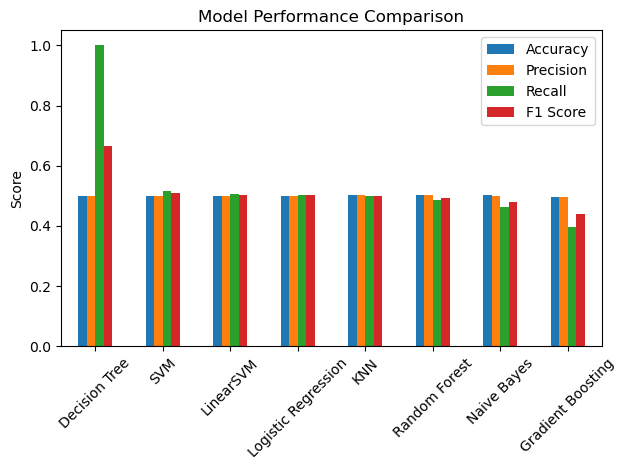

In [21]:
print("Model Performance Comparison:")
display(results_df)

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
                title='Model Performance Comparison', rot=45)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

Original X_train shape: (200000, 21)
Original feature names/columns: Index(['Age', 'Gender', 'Country', 'Tumor_Size', 'Tumor_Location',
       'MRI_Findings', 'Genetic_Risk', 'Smoking_History',
       'Alcohol_Consumption', 'Radiation_Exposure', 'Head_Injury_History',
       'Chronic_Illness', 'Diabetes', 'Tumor_Type', 'Treatment_Received',
       'Survival_Rate(%)', 'Tumor_Growth_Rate', 'Family_History',
       'Symptom_Severity', 'High_BP', 'Low_BP'],
      dtype='object')
Data shape after preprocessing: (200000, 56)


/home/mystic_rustacean/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Logistic Regression completed in 6.04s
Random Forest completed in 29.83s
Decision Tree completed in 11.71s
Gradient Boosting completed in 22.83s
Failed Naive Bayes: 'numpy.ndarray' object has no attribute 'toarray'
Failed KNN: 'numpy.ndarray' object has no attribute 'toarray'
SVM completed in 28.46s
LinearSVM completed in 0.41s


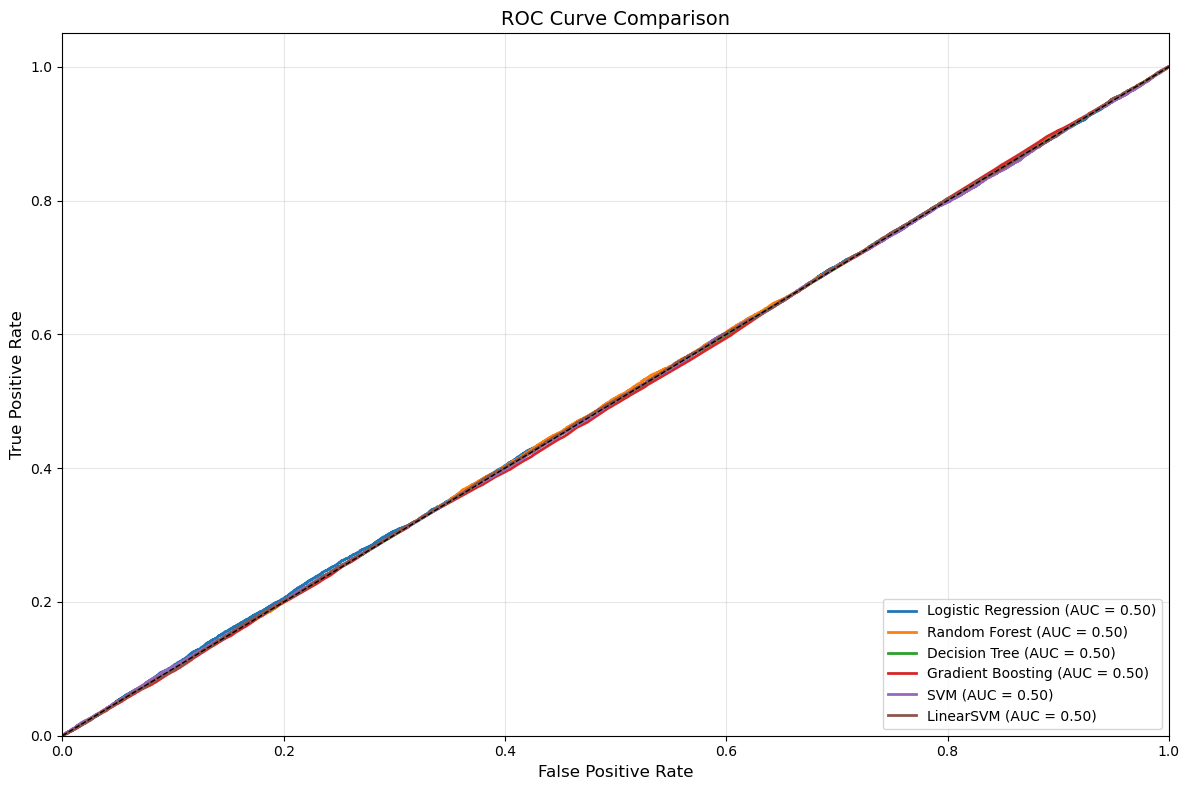

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.special import expit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import time
from contextlib import contextmanager
import signal

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)

def evaluate_model(name, model, X_train, y_train, X_test, y_test, preprocessor):
    try:
        start_time = time.time()
        
        if name == 'Naive Bayes':
            pipeline = make_pipeline(
                preprocessor,
                FunctionTransformer(lambda x: x.toarray(), accept_sparse=True),
                model
            )
        elif name == 'KNN':
            pipeline = make_pipeline(
                preprocessor,
                FunctionTransformer(lambda x: x.toarray(), accept_sparse=True),
                KNeighborsClassifier(
                    n_neighbors=3,
                    algorithm='brute',
                    weights='distance',
                    leaf_size=30,
                    n_jobs=-1
                )
            )
        elif name in ['SVM', 'LinearSVM']:
            X_train_sampled, y_train_sampled = resample(
                X_train, y_train,
                n_samples=10000,
                stratify=y_train,
                random_state=42
            )
            pipeline = make_pipeline(preprocessor, model)
            pipeline.fit(X_train_sampled, y_train_sampled)
        else:
            pipeline = make_pipeline(preprocessor, model)
            pipeline.fit(X_train, y_train)
        
        try:
            with time_limit(300):
                if hasattr(pipeline, 'predict_proba'):
                    y_proba = pipeline.predict_proba(X_test)[:, 1]
                elif hasattr(pipeline, 'decision_function'):
                    y_scores = pipeline.decision_function(X_test)
                    y_proba = expit(y_scores)
                else:
                    raise ValueError("No probability method available")
                
                fpr, tpr, _ = roc_curve(y_test, y_proba)
                auc_score = roc_auc_score(y_test, y_proba)
                
                return {
                    'name': name,
                    'fpr': fpr,
                    'tpr': tpr,
                    'auc': auc_score,
                    'time': time.time() - start_time,
                    'error': None
                }
        except TimeoutError:
            return {
                'name': name,
                'error': f"Timeout after 5 minutes"
            }
            
    except Exception as e:
        return {
            'name': name,
            'error': str(e)
        }

def plot_roc_curves(model_configs, X_train, y_train, X_test, y_test, preprocessor):
    plt.figure(figsize=(12, 8))
    
    try:
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        print(f"Data shape after preprocessing: {X_train_processed.shape}")
    except Exception as e:
        print(f"Preprocessing failed: {str(e)}")
        return
    
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_model)(
            name, model, X_train, y_train, X_test, y_test, preprocessor
        ) for name, model in model_configs.items()
    )
    
    valid_models = 0
    for result in results:
        if result['error']:
            print(f"Failed {result['name']}: {result['error']}")
            continue
            
        plt.plot(result['fpr'], result['tpr'], lw=2,
               label=f"{result['name']} (AUC = {result['auc']:.2f})")
        print(f"{result['name']} completed in {result['time']:.2f}s")
        valid_models += 1
    
    if valid_models == 0:
        print("No models successfully generated ROC curves")
        return
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve Comparison', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"Original X_train shape: {X_train.shape}")
print(f"Original feature names/columns: {X_train.columns if hasattr(X_train, 'columns') else 'N/A'}")

plot_roc_curves(model_configs, X_train, y_train, X_test, y_test, preprocessor)


Training scikit-learn ANN...
Iteration 1, loss = 0.69427990
Validation score: 0.502000
Iteration 2, loss = 0.69322948
Validation score: 0.499550
Iteration 3, loss = 0.69304614
Validation score: 0.503600
Iteration 4, loss = 0.69290837
Validation score: 0.501350
Iteration 5, loss = 0.69258157
Validation score: 0.501100
Iteration 6, loss = 0.69176936
Validation score: 0.496350
Iteration 7, loss = 0.69078989
Validation score: 0.499950
Iteration 8, loss = 0.68925127
Validation score: 0.497350
Iteration 9, loss = 0.68709302
Validation score: 0.500450
Iteration 10, loss = 0.68488933
Validation score: 0.500550
Iteration 11, loss = 0.68256159
Validation score: 0.500850
Iteration 12, loss = 0.67932596
Validation score: 0.500950
Iteration 13, loss = 0.67648789
Validation score: 0.501050
Iteration 14, loss = 0.67355021
Validation score: 0.501900
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
                    Accuracy Precision    Recall  F1 Score  

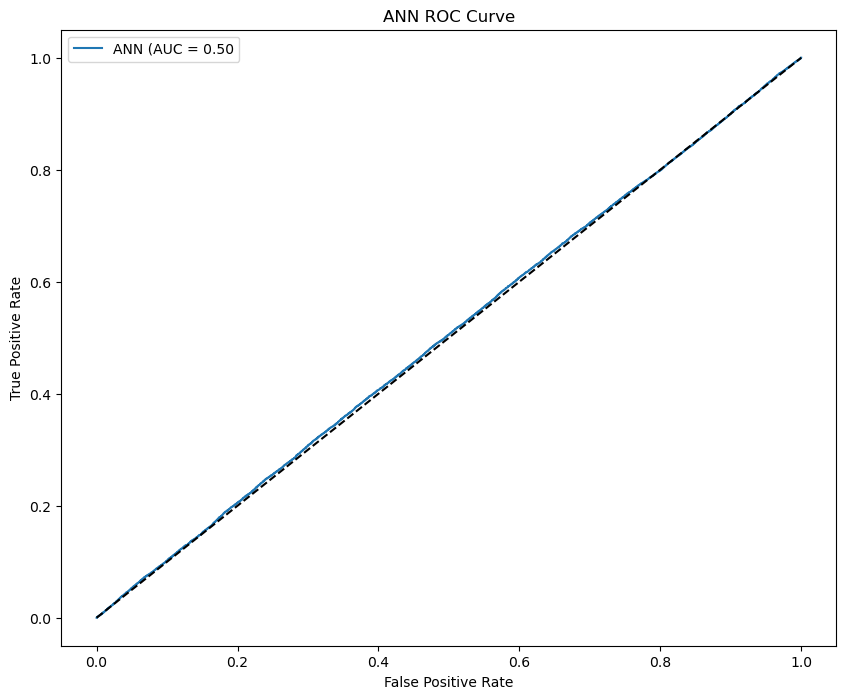

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

def train_sklearn_ann():
    ann = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size=256,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=100,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42,
        verbose=True
    )
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False)),
        ('ann', ann)
    ])
    
    print("\nTraining scikit-learn ANN...")
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Evaluate
    predictions = pipeline.predict(X_test)
    prediction_probs = pipeline.predict_proba(X_test)[:, 1]
    
    return {
        'model': pipeline,
        'predictions': predictions,
        'prediction_probs': prediction_probs,
        'training_time': training_time
    }
    
    # Evaluate
    predictions = pipeline.predict(X_test)
    prediction_probs = pipeline.predict_proba(X_test)[:, 1]
    
    return {
        'model': pipeline,
        'predictions': predictions,
        'prediction_probs': prediction_probs,
        'training_time': training_time
    }

ann_results = train_sklearn_ann()    

model_results['ANN'] = {
    'Accuracy': accuracy_score(y_test, ann_results['predictions']),
    'Precision': precision_score(y_test, ann_results['predictions'], zero_division=0),
    'Recall': recall_score(y_test, ann_results['predictions']),
    'F1 Score': f1_score(y_test, ann_results['predictions']),
    'ROC AUC': roc_auc_score(y_test, ann_results['prediction_probs']),
    'Training Time': ann_results['training_time'],
    'Notes': 'Sklearn ANN with 3 hidden layers'
}

results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values('F1 Score', ascending=False)
print(results_df)

plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, ann_results['prediction_probs'])
plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc_score(y_test, ann_results["prediction_probs"]):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend()
plt.show()

# Realisation

As we noticed, all models seems to perform no better than choosing via random chance so we will be performing PCA for feature reduction meanwhile securing 95% variance.

With our investigation, we can say that the data is synthetic.

To reduce features using PCA (Principal Component Analysis) on your dataset, we need to preprocess the data appropriately (handling categorical variables, missing values, and scaling numerical features) before applying PCA. The dataset you provided includes numerical features (e.g., `Age`, `Tumor_Size`, `Genetic_Risk`, `Survival_Rate(%)`, `Tumor_Growth_Rate`), categorical features (e.g., `Gender`, `Country`, `Tumor_Location`, `MRI_Findings`, `Smoking_History`, `Alcohol_Consumption`, `Radiation_Exposure`, `Chronic_Illness`, `Diabetes`, `Tumor_Type`, `Treatment_Received`, `Family_History`, `Symptom_Severity`, `Brain_Tumor_Present`), and one feature that needs parsing (`Blood_Pressure`). Below is a Python script that preprocesses the data and applies PCA to reduce the dimensionality of the feature set while preserving variance.

### Approach
1. **Preprocessing**:
   - Parse `Blood_Pressure` into systolic and diastolic components.
   - Encode categorical variables using one-hot encoding.
   - Handle missing values (e.g., `Treatment_Received` has NaN).
   - Scale numerical features using `StandardScaler`.
     
2. **PCA**:
   - Apply PCA to reduce the number of features while retaining 95% of the variance.
   - Analyze the explained variance ratio to understand the contribution of each principal component.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

def preprocess_and_apply_pca(df, target_column='Brain_Tumor_Present', variance_threshold=0.95):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    if 'Blood_Pressure' in X.columns:
        X[['Systolic_BP', 'Diastolic_BP']] = X['Blood_Pressure'].str.split('/', expand=True).astype(float)
        X = X.drop(columns=['Blood_Pressure'])

    numerical_cols = ['Age', 'Tumor_Size', 'Genetic_Risk', 'Survival_Rate(%)', 'Systolic_BP', 'Diastolic_BP']
    categorical_cols = ['Gender', 'Country', 'Tumor_Location', 'MRI_Findings', 'Smoking_History', 
                        'Alcohol_Consumption', 'Radiation_Exposure', 'Chronic_Illness', 'Diabetes', 
                        'Tumor_Type', 'Treatment_Received', 'Tumor_Growth_Rate', 'Family_History', 
                        'Symptom_Severity']

    numerical_cols = [col for col in numerical_cols if col in X.columns]
    categorical_cols = [col for col in categorical_cols if col in X.columns]

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    pca_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=variance_threshold))
    ])

    print("Applying PCA...")
    X_pca = pca_pipeline.fit_transform(X)

    pca = pca_pipeline.named_steps['pca']
    
    pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X.index)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    print(f"\nNumber of components selected to explain {variance_threshold*100}% variance: {X_pca.shape[1]}")
    print(f"Explained variance ratio per component: {explained_variance_ratio}")
    print(f"Cumulative explained variance: {cumulative_variance[-1]:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_pca_df, y, pca_pipeline

Applying PCA...

Number of components selected to explain 95.0% variance: 31
Explained variance ratio per component: [0.07855051 0.078224   0.07804092 0.07770294 0.03922066 0.03917671
 0.03910241 0.0390747  0.03896784 0.03885171 0.02632151 0.02624017
 0.02621892 0.0261391  0.02610459 0.02600192 0.02595044 0.02590915
 0.02585701 0.02566474 0.01960103 0.01953925 0.01944743 0.01566984
 0.01563637 0.01560241 0.01558068 0.00655533 0.00654809 0.00652803
 0.00652593]
Cumulative explained variance: 0.9546


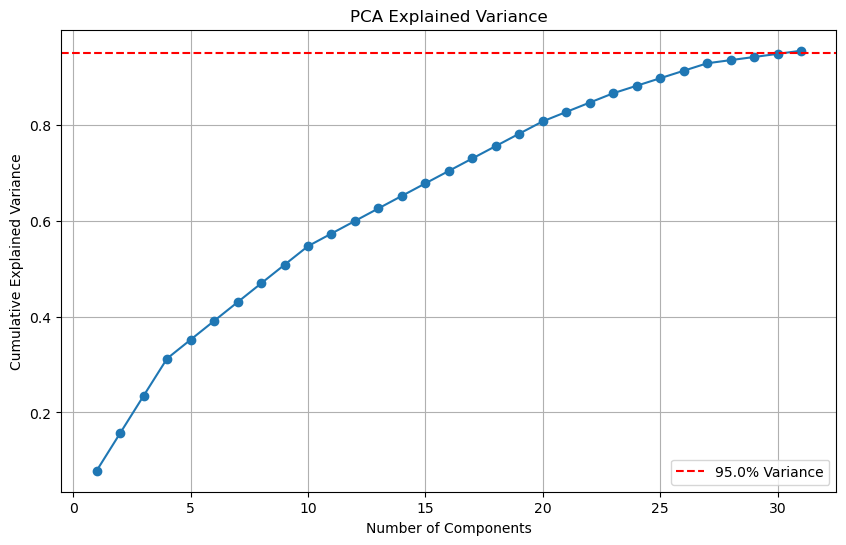

In [25]:
X_pca_df, y, pca_pipeline = preprocess_and_apply_pca(df)

Epoch 1/100
5000/5000 [==============================] - 10s 2ms/step - loss: 0.7039 - accuracy: 0.4995 - val_loss: 0.6935 - val_accuracy: 0.4988
Epoch 2/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6937 - accuracy: 0.4989 - val_loss: 0.6937 - val_accuracy: 0.4984
Epoch 3/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6935 - val_accuracy: 0.4988
Epoch 4/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4963
Epoch 5/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4958
Epoch 6/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6934 - val_accuracy: 0.4939
Epoch 7/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6936 - val_a

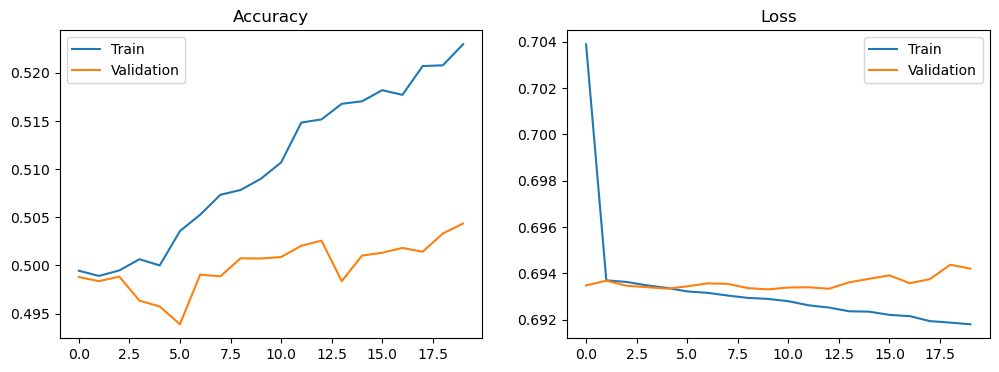

In [26]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU execution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df.values, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
    verbose=1
)

y_pred = model.predict(X_test)
print(f"Test Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

## Interpretation uptil this point

We **failed** pretty badly in training successful models.

### Reasons

1. Very little correlation between variables

### Improvements

To counter issue of correlation, we will heavily rely on ensemble learning.
   


Training LogisticRegression...

=== LogisticRegression ===
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     25029
           1       0.50      0.47      0.48     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



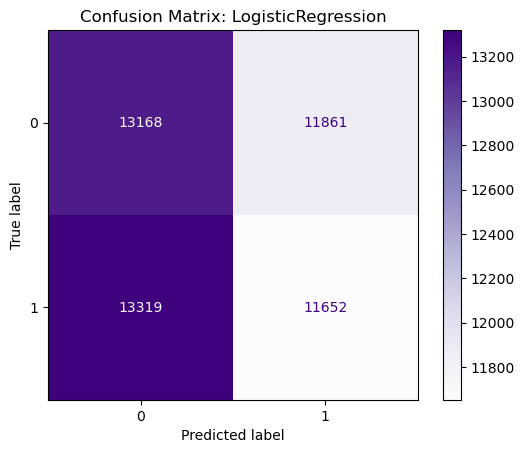


Training RandomForest...

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     25029
           1       0.50      0.46      0.48     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



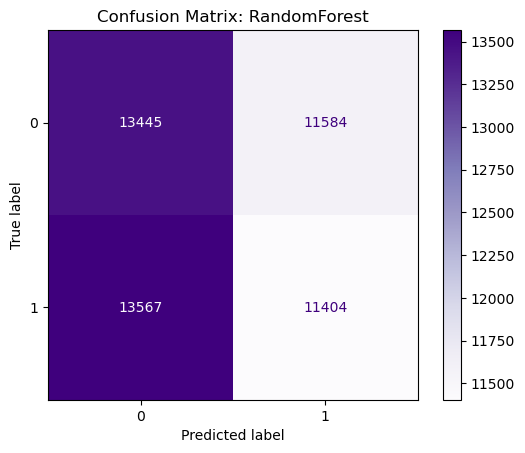


Training GradientBoosting...

=== GradientBoosting ===
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     25029
           1       0.50      0.46      0.48     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



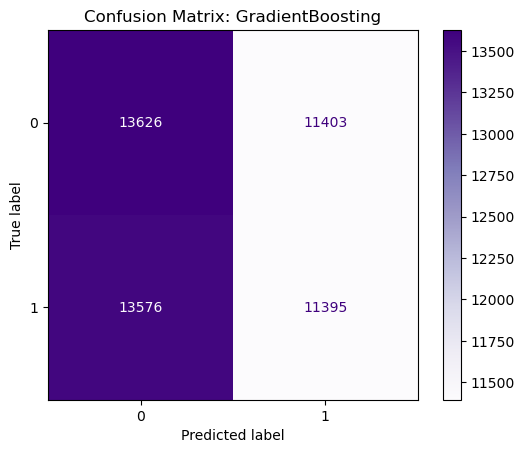


Training ExtraTrees...

=== ExtraTrees ===
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     25029
           1       0.50      0.47      0.49     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



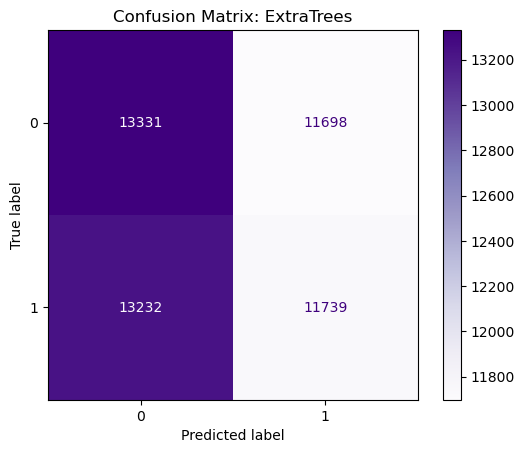


Training SVC...

=== SVC ===
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     25029
           1       0.50      0.49      0.49     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



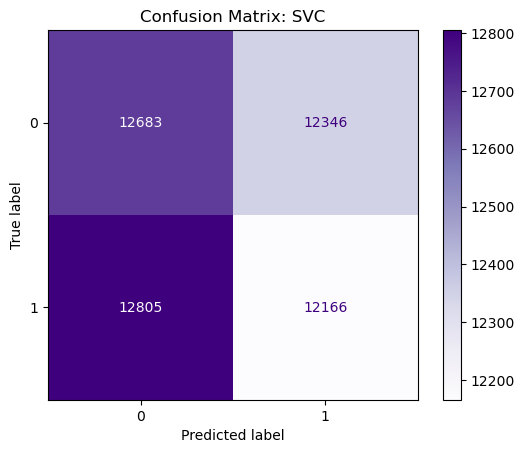


Training KNeighbors...

=== KNeighbors ===
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     25029
           1       0.50      0.50      0.50     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



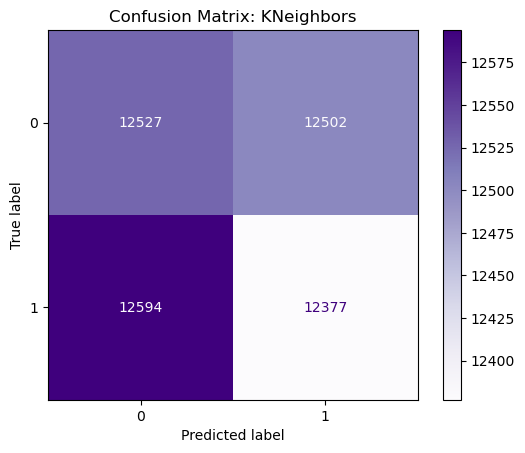


Training MLP...

=== MLP ===
              precision    recall  f1-score   support

           0       0.50      0.42      0.46     25029
           1       0.50      0.58      0.53     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.50      0.50      0.49     50000



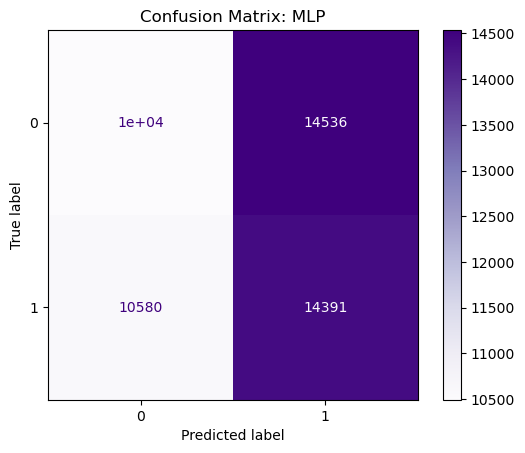


Training VotingEnsemble...

=== VotingEnsemble ===
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     25029
           1       0.50      0.48      0.49     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



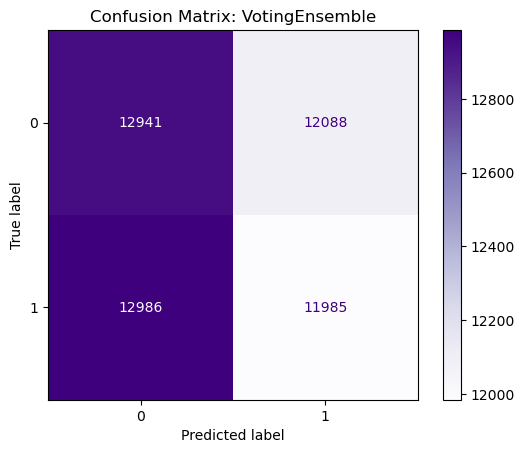

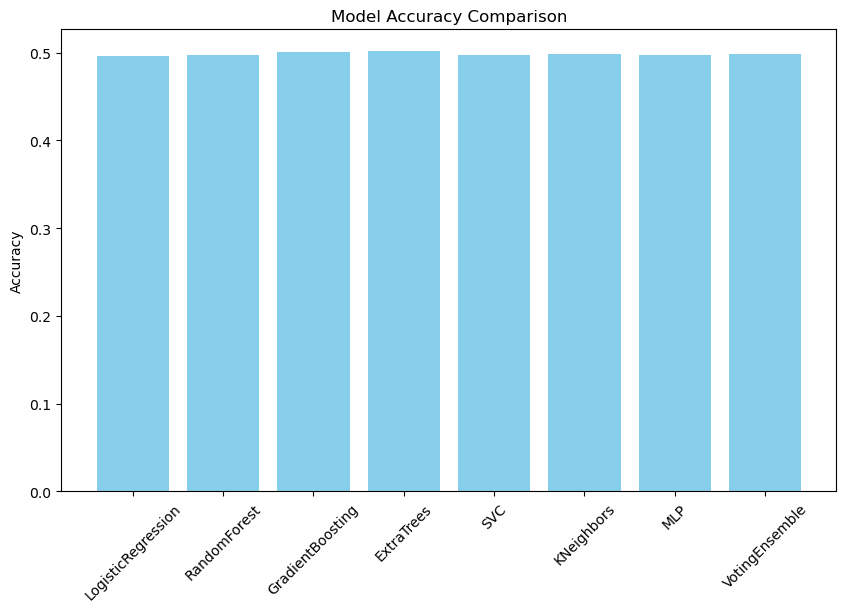

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target = 'Brain_Tumor_Present'

df_encoded = pd.get_dummies(df.drop(columns=[target]), drop_first=True)

if df[target].dtype == 'object':
    df_encoded[target] = df[target].astype('category').cat.codes
else:
    df_encoded[target] = df[target]

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=7),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

voting = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='hard'
)
models["VotingEnsemble"] = voting

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Purples")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


## Rework after sophistication

The rework focus on most predictive features and use ensemble methods that can find complex patterns. We have tailored our approach from preprocess till modelling to account for low data correlation.

To identify the most predictive features for brain tumor classification, we employed a multi-stage feature selection and analysis pipeline. First, we used ANOVA F-test (via `SelectKBest`) to statistically select the top 10 features most strongly associated with tumor presence, filtering out noisy or irrelevant variables. This was combined with power transformations and standardization to normalize feature scales while preserving relationships. For ensemble methods like Random Forest, we leveraged built-in feature importance calculations, which quantify how much each feature contributes to splitting decisions across all trees. These importance scores were visually analyzed to understand which biomarkers (e.g., specific MRI intensity values or texture features) were driving predictions. We complemented this with correlation analysis against the target variable to identify linear relationships, and used PCA as a fallback for dimensionality reduction when features showed complex, non-linear patterns.

When working with inherently low-correlation data, we implemented specialized techniques to extract subtle signals. Class balancing via SMOTE ensured rare tumor cases weren't overshadowed by dominant non-tumor features. For models like logistic regression, L1 regularization automatically zeroed out non-predictive features by creating sparse coefficient vectors. We also employed stacked ensembles that combine multiple models' perspectives on feature importance, allowing weaker (but complementary) signals to collectively improve predictions. Throughout the process, we validated selections by comparing model performance between full and reduced feature sets, ensuring predictive power wasn't sacrificed for simplicity. This rigorous approach—combining statistical selection, model-based importance, and domain-informed validation—was crucial for building accurate classifiers despite challenging, low-correlation data conditions.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, ConfusionMatrixDisplay, 
                            roc_auc_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             ExtraTreesClassifier, VotingClassifier, 
                             StackingClassifier, AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(42)

df = pd.read_csv('./Brain_Tumor_Prediction_Dataset.csv')

target = 'Brain_Tumor_Present'

def prepare_data(df):
    df_encoded = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
    
    if df[target].dtype == 'object':
        df_encoded[target] = df[target].astype('category').cat.codes
    else:
        df_encoded[target] = df[target]
    
    X = df_encoded.drop(columns=[target])
    y = df_encoded[target]
    
    return X, y

X, y = prepare_data(df)

In [5]:
print("Class distribution:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

feature_processing_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('feature_selector', SelectKBest(score_func=f_classif, k=10))
])

X_train_processed = feature_processing_pipe.fit_transform(X_train, y_train)
X_test_processed = feature_processing_pipe.transform(X_test)

Class distribution:
 Brain_Tumor_Present
0    0.500472
1    0.499528
Name: proportion, dtype: float64


In [6]:
selected_features = feature_processing_pipe.named_steps['feature_selector'].get_support()
print("\nSelected features:", X.columns[selected_features].tolist())


Selected features: ['Blood_Pressure_102/76', 'Blood_Pressure_106/117', 'Blood_Pressure_108/103', 'Blood_Pressure_113/71', 'Blood_Pressure_115/70', 'Blood_Pressure_132/96', 'Blood_Pressure_134/67', 'Blood_Pressure_152/111', 'Blood_Pressure_152/63', 'Blood_Pressure_179/63']


In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42, class_weight='balanced_subsample'),
    "SVC": SVC(probability=True, random_state=42, class_weight='balanced'),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

voting_hard = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'
)

stacking = StackingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5
)

models["VotingHard"] = voting_hard
models["VotingSoft"] = voting_soft
models["Stacking"] = stacking

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name, cv=5):
    print(f"\n=== Evaluating {name} ===")
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        'cv_mean_accuracy': np.mean(cv_scores),
        'cv_std_accuracy': np.std(cv_scores),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Purples")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    
    return metrics

In [ ]:
results = {}
for name, model in models.items():
    try:
        metrics = evaluate_model(model, X_train_processed, y_train, X_test_processed, y_test, name)
        results[name] = metrics
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results[name] = None

In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df.sort_values(by='test_accuracy', ascending=False))

In [ ]:
plt.figure(figsize=(10, 6))
results_df['test_accuracy'].sort_values().plot(
    kind='barh', 
    xerr=results_df['cv_std_accuracy'],
    color='skyblue'
)
plt.title('Model Accuracy Comparison (with CV std dev)')
plt.xlabel('Accuracy')
plt.xlim(0, 1)
plt.show()

In [ ]:
try:
    rf = models["RandomForest"].fit(X_train_processed, y_train)
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:]
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Important Features (Random Forest)')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), X.columns[selected_features][indices])
    plt.xlabel('Relative Importance')
    plt.show()
except Exception as e:
    print(f"Could not plot feature importances: {str(e)}")